# Innovasjon Norge Virkemidler

In [1]:
import deetly
import json
import pandas as pd
import plotly.express as px

In [2]:
# Create datastory
package = {
    "name": "Innovasjon Norge Virkemiddler",
    "keywords":["plotly","plotly express","examples"],
}

ds = deetly.story(package)

In [20]:
url = 'https://indatapublic.blob.core.windows.net/tildelingsrapport/Tildelinger.csv'
df = pd.read_csv(url, encoding="latin-1", sep=";")

In [21]:
df.head()

,Fylkesnavn,Kommunenavn,Org-nr,Bedriftsnavn,Virkemiddelkategori,Underkategori,Innvilget beløp,Innvilget dato,Beslutningsenhet,Næringshovedområde,Næring,Type finansiering
0,Møre og Romsdal,Vestnes,977224705.0,EIKTRAPP AS,Lavrisikolån,Lavrisikolån industri og tjenesteyting,4000000.0,20.09.16,IN Møre og Romsdal,C - Industri,16.232 Produksjon av bygningsartikler,Lån
1,Oslo,Oslo,989284215.0,DRYLAB R & D AS,Risikolån og garantier,Landsdekkende risikolån,2050000.0,01.06.16,IN Oslo og Akershus,"M - Faglig, vitenskapelig og teknisk tjenestey...",72.190 Annen forskning og annet utviklingsarbe...,Lån
2,Sør-Trøndelag,Midtre Gauldal,NaN,JANNE OLIV SØRLØKKEN,Landbrukstilskudd,Fylkesvise investerings- og bedriftsutviklings...,350000.0,18.01.16,IN Sør-Trøndelag,Uspesifisert,Uspesifisert Uspesifisert,Tilskudd
3,Sør-Trøndelag,Trondheim,813727102.0,ASSITECH AS,Risikolån og garantier,Landsdekkende risikolån,800000.0,18.02.16,IN Sør-Trøndelag,"M - Faglig, vitenskapelig og teknisk tjenestey...","74.101 Industridesign, produktdesign og annen ...",Lån
4,Rogaland,Eigersund,NaN,IVAR PUNTERVOLL,Landbrukstilskudd,Fylkesvise investerings- og bedriftsutviklings...,600000.0,13.05.16,IN Rogaland,Uspesifisert,Uspesifisert Uspesifisert,Tilskudd


In [22]:
#df.rename(columns={'Type finansiering': 'Type_finansiering'}, inplace=True)
df.columns

Index(['Fylkesnavn', 'Kommunenavn', 'Org-nr', 'Bedriftsnavn',
       'Virkemiddelkategori', 'Underkategori', 'Innvilget beløp',
       'Innvilget dato', 'Beslutningsenhet', 'Næringshovedområde', 'Næring',
       'Type finansiering'],
      dtype='object')

In [25]:
df_fylker = df[['Fylkesnavn','Type finansiering','Innvilget beløp']].groupby(['Fylkesnavn','Type finansiering'],as_index=False)['Innvilget beløp'].sum()

In [26]:
df_fylker

,Fylkesnavn,Type finansiering,Innvilget beløp
0,Agder,Garanti,33235500.0
1,Agder,Lån,228631529.0
2,Agder,Tilskudd,550166882.0
3,Akershus,Lån,257450250.0
4,Akershus,Tilskudd,381487604.0
...,...,...,...
72,Viken,Garanti,43050000.0
73,Viken,Lån,362531621.0
74,Viken,Tilskudd,873093547.0
75,Østfold,Lån,200855000.0


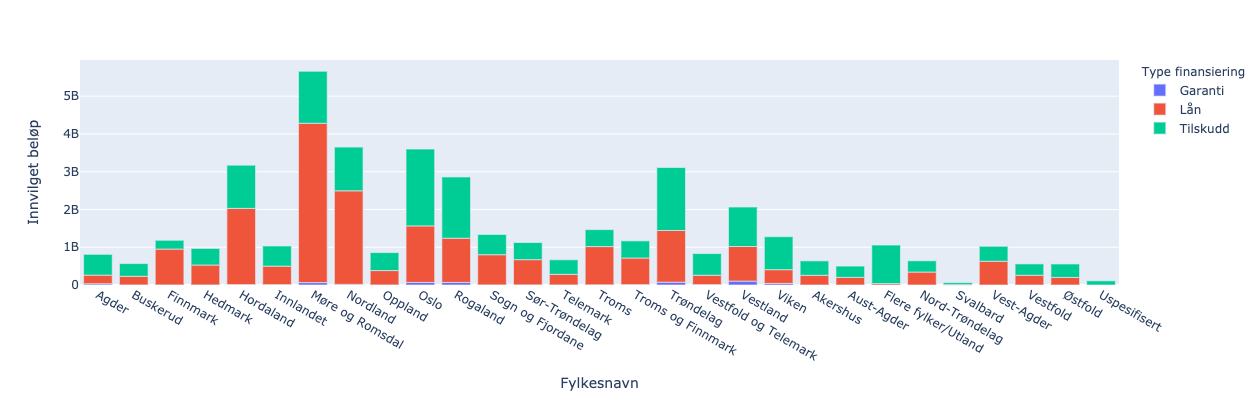

In [31]:
import plotly.express as px

fig = px.bar(df_fylker, x='Fylkesnavn', y='Innvilget beløp',color='Type finansiering',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [6]:
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [6]:
description = """
Ledige stillinger og sysselsetting
"""

ds.plotly(fig, "Ledige stillinger og sysselsetting",description)

In [7]:
#ds.publish()